In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/waferImages.zip'

-rw------- 1 root root 1141460846 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/waferImages.zip'


In [6]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/waferImages.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: waferimages/waferimages/training/none/753521.png  
  inflating: waferimages/waferimages/training/none/753522.png  
  inflating: waferimages/waferimages/training/none/753523.png  
  inflating: waferimages/waferimages/training/none/753524.png  
  inflating: waferimages/waferimages/training/none/753525.png  
  inflating: waferimages/waferimages/training/none/753526.png  
  inflating: waferimages/waferimages/training/none/753527.png  
  inflating: waferimages/waferimages/training/none/753528.png  
  inflating: waferimages/waferimages/training/none/753529.png  
  inflating: waferimages/waferimages/training/none/753530.png  
  inflating: waferimages/waferimages/training/none/753531.png  
  inflating: waferimages/waferimages/training/none/753532.png  
  inflating: waferimages/waferimages/training/none/753533.png  
  inflating: waferimages/waferimages/training/none/753534.png  
  inflating: waferimages/waferimages/training/none/753535.png  
  in

In [7]:
!ls -l waferimages/waferimages

total 12
-rw-r--r--  1 root root  645 Jul  5  2020 Script_To_Generate_Images.py
drwxr-xr-x 11 root root 4096 Apr  5 07:13 testing
drwxr-xr-x 11 root root 4096 Apr  5 07:14 training


In [8]:
train_dir = 'waferimages/waferimages/training'
test_dir = 'waferimages/waferimages/testing'

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(300, 300), batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(300,300), batch_size=20, class_mode='categorical')

Found 54374 images belonging to 9 classes.
Found 118595 images belonging to 9 classes.


In [10]:
from keras.applications import ResNet50

conv_base = ResNet50(weights = 'imagenet', include_top = False, input_shape=(300,300,3))

conv_base.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
__________________________

In [11]:
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'conv5_block1_1_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [12]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               104858112 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 2313      
Total params: 128,579,465
Trainable params: 119,967,753
Non-trainable params: 8,611,712
__________________________________

In [13]:
from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.000003), metrics=['accuracy'])

In [14]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=100, epochs=20, validation_data=test_generator, validation_steps=100)

Epoch 1/20
100/100 [==============================] - 68s 318ms/step - loss: 1.1163 - accuracy: 0.7067 - val_loss: 2.0297 - val_accuracy: 0.0665
Epoch 2/20
100/100 [==============================] - 31s 310ms/step - loss: 0.5253 - accuracy: 0.8638 - val_loss: 1.6071 - val_accuracy: 0.5700
Epoch 3/20
100/100 [==============================] - 31s 314ms/step - loss: 0.5096 - accuracy: 0.8709 - val_loss: 1.6661 - val_accuracy: 0.4855
Epoch 4/20
100/100 [==============================] - 32s 319ms/step - loss: 0.4446 - accuracy: 0.8739 - val_loss: 1.1742 - val_accuracy: 0.6505
Epoch 5/20
100/100 [==============================] - 33s 329ms/step - loss: 0.3906 - accuracy: 0.8969 - val_loss: 1.1319 - val_accuracy: 0.6025
Epoch 6/20
100/100 [==============================] - 33s 332ms/step - loss: 0.3960 - accuracy: 0.8931 - val_loss: 1.1831 - val_accuracy: 0.6210
Epoch 7/20
100/100 [==============================] - 35s 348ms/step - loss: 0.4400 - accuracy: 0.8872 - val_loss: 0.7781 - val_ac

In [15]:
loss, accuracy = model.evaluate(test_generator, steps=100)
loss, accuracy

100/100 [==============================] - 14s 137ms/step - loss: 1.6904 - accuracy: 0.4980


(1.690373420715332, 0.49799999594688416)

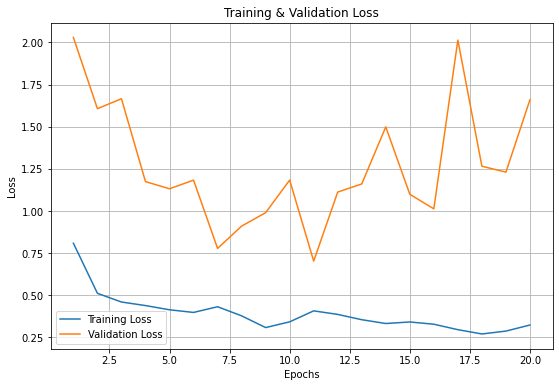

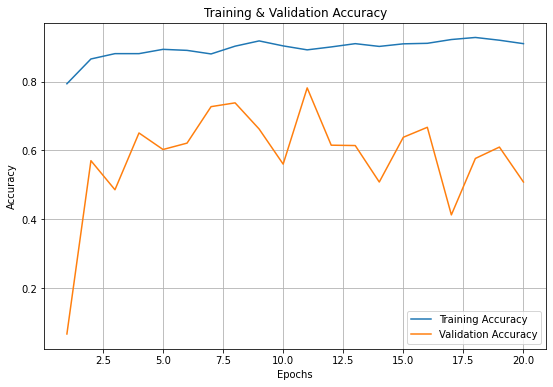

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

# step epoch 변경

In [17]:
print(54374/20)
print(118595 / 20)

2718.7
5929.75


In [18]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=2178, epochs=20, validation_data=test_generator, validation_steps=5929)

Epoch 1/20
2178/2178 [==============================] - 1226s 563ms/step - loss: 0.2669 - accuracy: 0.9274 - val_loss: 1.5988 - val_accuracy: 0.4726
Epoch 2/20
2178/2178 [==============================] - 1225s 562ms/step - loss: 0.2288 - accuracy: 0.9366 - val_loss: 1.6940 - val_accuracy: 0.4726
Epoch 3/20
2178/2178 [==============================] - 1224s 562ms/step - loss: 0.2074 - accuracy: 0.9423 - val_loss: 1.3728 - val_accuracy: 0.5246
Epoch 4/20
2178/2178 [==============================] - 1222s 561ms/step - loss: 0.1847 - accuracy: 0.9480 - val_loss: 2.0432 - val_accuracy: 0.4563
Epoch 5/20
2178/2178 [==============================] - 1224s 562ms/step - loss: 0.1706 - accuracy: 0.9520 - val_loss: 2.1602 - val_accuracy: 0.4418
Epoch 6/20
2178/2178 [==============================] - 1224s 562ms/step - loss: 0.1559 - accuracy: 0.9562 - val_loss: 2.0223 - val_accuracy: 0.4347
Epoch 7/20
2178/2178 [==============================] - 1223s 561ms/step - loss: 0.1483 - accuracy: 0.9581

In [ ]:
loss, accuracy = model.evaluate(test_generator, steps=5929)
loss, accuracy

 118/5929 [..............................] - ETA: 13:33 - loss: 2.3534 - accuracy: 0.4500